In [ ]:
import cv2
import os
import shutil

# Tạo thư mục con ( 8 lớp )
def prepare_class_directories(input_dir, output_dir, class_names):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for class_name in class_names:
        class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

# Chức năng cắt ảnh và lưu vào đúng thư mục lớp
def crop_images_in_directory(input_dir, output_dir, class_names, crop_x_left=30):
    prepare_class_directories(input_dir, output_dir, class_names)

    for class_name in class_names:
        class_input_dir = os.path.join(input_dir, class_name)
        class_output_dir = os.path.join(output_dir, class_name)

        if os.path.exists(class_input_dir):
            for file in os.listdir(class_input_dir):
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(class_input_dir, file)
                    img = cv2.imread(file_path)
                    if img is not None:
                        h, w, _ = img.shape
                        img_cropped = img[:, crop_x_left:w, :]  # Crop the image
                        save_path = os.path.join(class_output_dir, file)
                        cv2.imwrite(save_path, img_cropped)

# Set up
train_data_dir = "kvasir-dataset-v2/train"
cropped_train_data_dir = "kvasir-dataset-v2/cropped_train"
class_names = ['normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 
               'ulcerative-colitis', 'esophagitis', 'dyed-lifted-polyps', 'dyed-resection-margins']

# Thực hiện cắt ảnh trong thư mục train
crop_images_in_directory(train_data_dir, cropped_train_data_dir, class_names, crop_x_left=250)


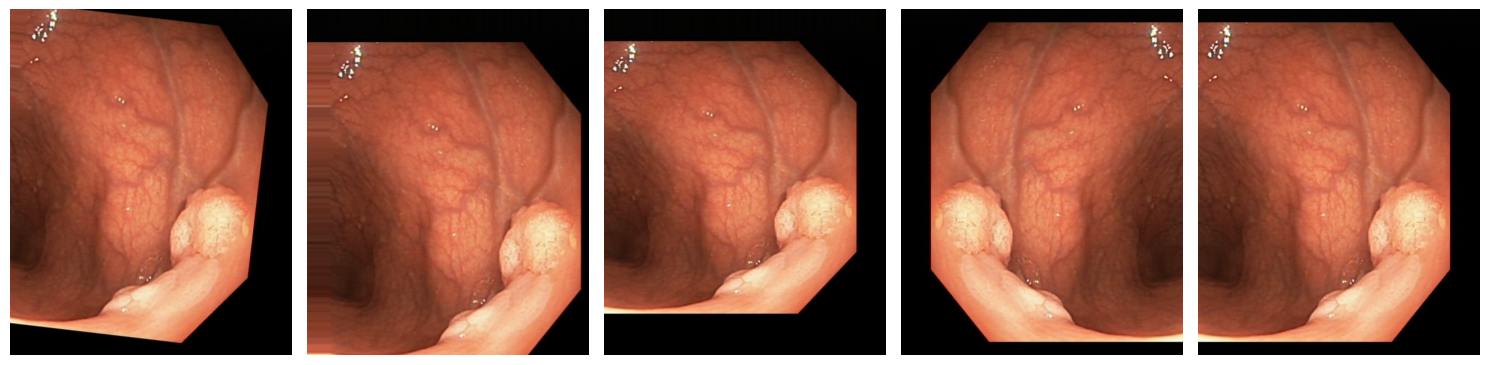

In [11]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh gốc
img_path = r'kvasir-dataset-v2/cropped_train/polyps/0a009a95-3a1f-46cf-906c-3606839806d8.jpg'

# Đọc ảnh bằng OpenCV
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)  # Chuyển đổi ảnh sang dạng 4D (batch size 1)

# Tạo các đối tượng ImageDataGenerator riêng biệt cho từng phép biến đổi
datagen_rotation = ImageDataGenerator(rotation_range=10, fill_mode='nearest')
datagen_shift = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, fill_mode='nearest')
datagen_zoom = ImageDataGenerator(zoom_range=[0.8, 1.2], fill_mode='nearest')
datagen_flip = ImageDataGenerator(horizontal_flip=True, fill_mode='nearest')

# Tạo một đối tượng DataGenerator kết hợp nhiều biến đổi
datagen_combined = ImageDataGenerator(
    fill_mode='nearest'
)

# Hiển thị 5 biến thể theo đúng thứ tự phép biến đổi
plt.figure(figsize=(15, 5))

# Rotation
augmented_img_rotation = next(datagen_rotation.flow(img, batch_size=1))[0].astype('uint8')
plt.subplot(1, 5, 1)
plt.imshow(augmented_img_rotation)
plt.axis('off')

# Shift
augmented_img_shift = next(datagen_shift.flow(img, batch_size=1))[0].astype('uint8')
plt.subplot(1, 5, 2)
plt.imshow(augmented_img_shift)
plt.axis('off')

# Zoom
augmented_img_zoom = next(datagen_zoom.flow(img, batch_size=1))[0].astype('uint8')
plt.subplot(1, 5, 3)
plt.imshow(augmented_img_zoom)
plt.axis('off')

# Flip
augmented_img_flip = next(datagen_flip.flow(img, batch_size=1))[0].astype('uint8')
plt.subplot(1, 5, 4)
plt.imshow(augmented_img_flip)
plt.axis('off')

# FIll
augmented_img_combined = next(datagen_combined.flow(img, batch_size=1))[0].astype('uint8')
plt.subplot(1, 5, 5)
plt.imshow(augmented_img_combined)
plt.axis('off')

plt.tight_layout()
plt.show()

# Tạo một đối tượng DataGenerator kết hợp nhiều biến đổi
datagen_combined = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)
